In [1]:
from dataclasses import dataclass
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

In [31]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,          # Randomly flip images horizontally
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [32]:
train_generator = train_datagen.flow_from_directory(
    r'F:\Projects\Potato-Disease-End-To-End-Project\dataset\Village-dataset',
    target_size=(256,256),
    batch_size=32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    r'F:\Projects\Potato-Disease-End-To-End-Project\dataset\Village-dataset',
    target_size=(256,256),
    batch_size=32,
    class_mode = 'categorical'
)

Found 2152 images belonging to 3 classes.
Found 2152 images belonging to 3 classes.


In [33]:
image_batches = next(train_generator)

In [34]:
image_batches[0][0].shape

(256, 256, 3)

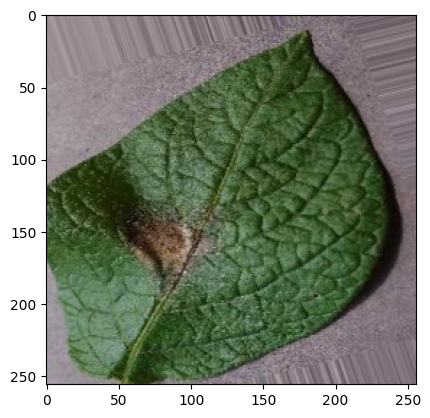

In [35]:
plt.imshow(image_batches[0][0])

In [36]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0

In [50]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(256,256,3))

In [51]:
base_model.trainable = True
for layer in base_model.layers[:100]:  # Freeze first 100 layers
    layer.trainable = False

In [52]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [53]:
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [54]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 8, 8, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,213,926 (16.07 MB)

 Trainable params: 4,004,703 (15.28 MB)

 Non-trainable params: 209,223 (817.28 KB)

In [56]:
from tensorflow.keras.callbacks import EarlyStopping

In [57]:
es_callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [58]:
model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[es_callback]

)

f:\Projects\Potato-Disease-End-To-End-Project\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 319s 4s/step - accuracy: 0.5897 - loss: 0.8545 - val_accuracy: 0.0704 - val_loss: 1.2500
Epoch 2/20
 1/67 ━━━━━━━━━━━━━━━━━━━━ 2:34 2s/step - accuracy: 0.7500 - loss: 0.7460

f:\Projects\Potato-Disease-End-To-End-Project\venv\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


67/67 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.7500 - loss: 0.7460 - val_accuracy: 0.0709 - val_loss: 1.2483
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 256s 4s/step - accuracy: 0.7640 - loss: 0.6042 - val_accuracy: 0.0704 - val_loss: 1.1996
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.7500 - loss: 0.4444 - val_accuracy: 0.0704 - val_loss: 1.1999
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 260s 4s/step - accuracy: 0.7776 - loss: 0.5399 - val_accuracy: 0.4641 - val_loss: 1.1868
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.7500 - loss: 0.6088 - val_accuracy: 0.4641 - val_loss: 1.1899
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 253s 4s/step - accuracy: 0.8092 - loss: 0.4758 - val_accuracy: 0.4636 - val_loss: 1.3483
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.8438 - loss: 0.3819 - val_accuracy: 0.4655 - val_loss: 1.3465
